
 

 ---------------------------------------------
|Dynamic Routing with Node Failure Simulation:|
 ---------------------------------------------




Current Network Shortest Paths from source router #0 below


Vertex		Distance from Source
0		0
1		13
2		8
3		25
4		14
5		13
6		17
7		34
8		30
9		26
10		28
11		34
12		19
13		35
14		24
15		22
16		17
17		27
18		28
19		32
20		34


All 21 network routers currently active!


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Current time: 17: 38: 39


Nodes #8 and 

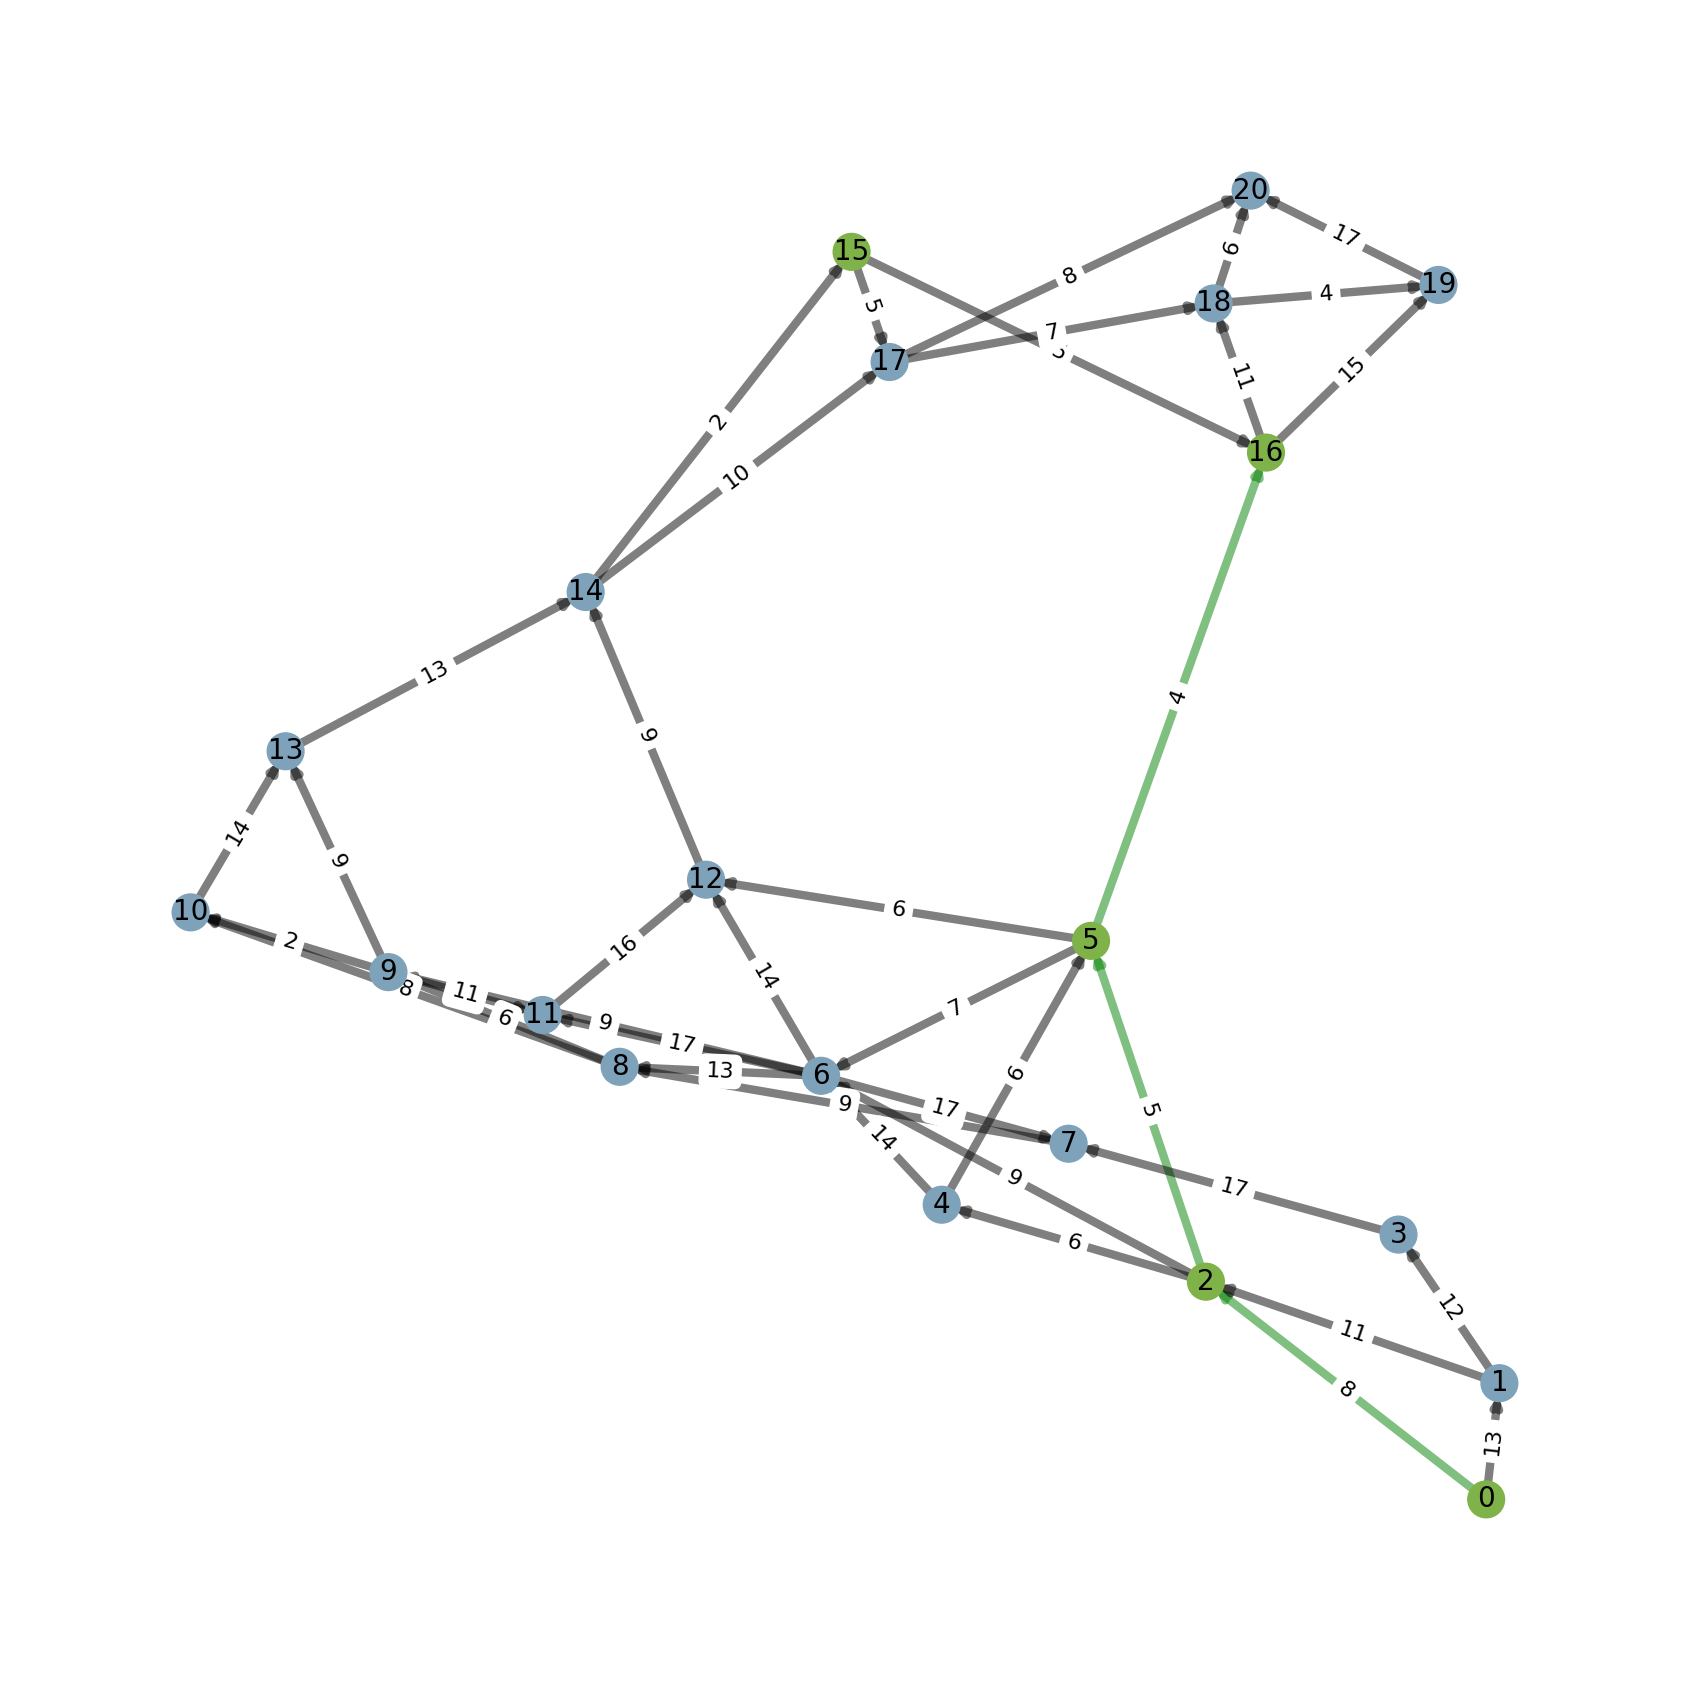

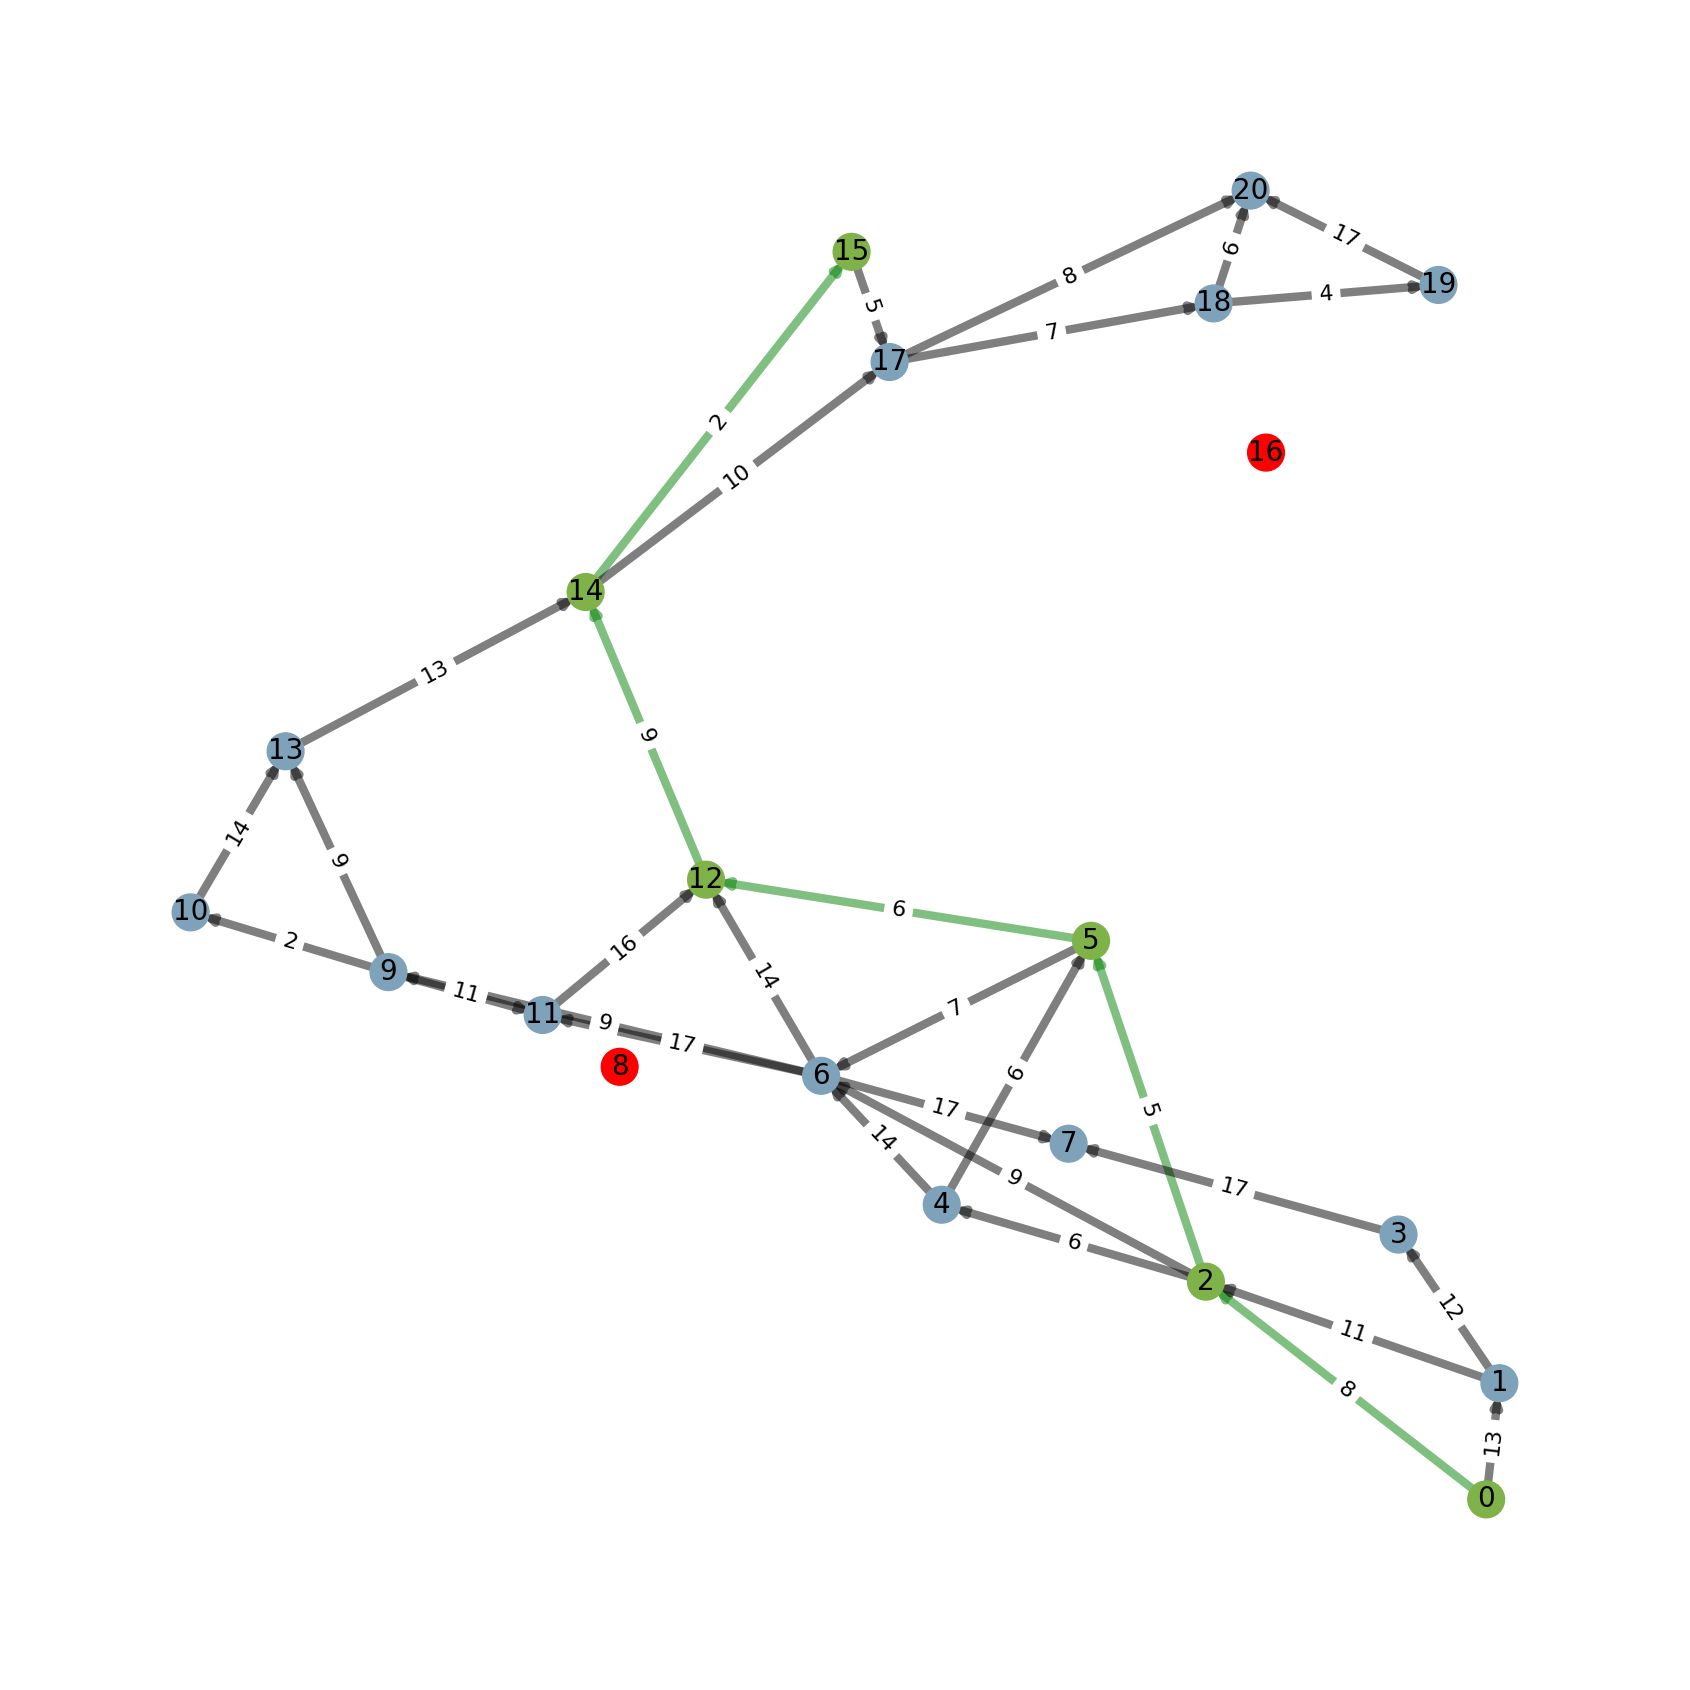

In [4]:
#Author: Cameron McCoy
#Date: 03/09/2023
#Version 1.0



import router
import sys
import numpy as np
import random
import time
import graph
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors


random.seed()


def main():
    
    
    node1 = 0  
    node2 = 15  
    
    

    edges = []
    numRouters1 = 21
    
    
    
    print('\n', '\n')
    print(' ---------------------------------------------')
    print('|Dynamic Routing with Node Failure Simulation:|')
    print(' ---------------------------------------------')
    print('\n')
    
    
    
    
    source_router = 0

    routerList = []
    
    updatedWeightedMatrix = np.zeros(shape=(numRouters1,numRouters1), dtype=int)
    weightedMatrix = np.zeros(shape=(numRouters1,numRouters1), dtype=int)
    adjacencyMatrix = np.zeros(shape=(numRouters1, numRouters1), dtype=int)

    numRouters = adjacencyMatrix.shape[0]
    
    
    

    
    #Initial creation of routers with edges 
    
    

    r1 = router.Router(1, [2, 3], routerList)
    r2 = router.Router(2, [
                       3, 4], routerList)
    r3 = router.Router(3,[
                       1, 2, 5, 6, 7], routerList)
    r4 = router.Router(4, [2, 8], routerList)
    r5 = router.Router(5,[
                       3, 6, 7], routerList)
    r6 = router.Router(6,[
                       3, 5, 7, 13, 17], routerList)
    r7 = router.Router(7,[
                       3, 5, 6, 8, 9, 10, 12, 13], routerList)
    r8 = router.Router(8,[
                       4, 7, 9], routerList)
    r9 = router.Router(9,[
                       7, 8, 10, 11], routerList)
    r10 = router.Router(10,[
                        7, 9, 11, 12, 14], routerList)
    r11 = router.Router(11,[
                        9, 10, 14], routerList)
    r12 = router.Router(12,[
                        7, 10, 13], routerList)
    r13 = router.Router(13,[
                        6, 7, 12, 15], routerList)
    r14 = router.Router(14,[
                        10, 11, 15], routerList)
    r15 = router.Router(15,[
                        13, 16, 18], routerList)
    r16 = router.Router(16,[
                        15, 17, 18], routerList)
    r17 = router.Router(17,[
                        6, 16, 19, 20], routerList)
    r18 = router.Router(18,[
                        15, 16, 21], routerList)
    r19 = router.Router(19,[
                        17, 18, 20, 21], routerList)
    r20 = router.Router(20,[
                        17, 19, 21], routerList)
    r21 = router.Router(21,[
                        18, 19, 20], routerList)
    
    
    
    
    
    
    
    
    #setting Adjacency Matrix edges and matching weights in Weighted Matrix
    
    for r in range(len(routerList)):
        for j in range(len(routerList)):
            if routerList[r].has_edge(routerList[j]):
                adjacencyMatrix[r, j] = 1
                weight = random.randint(1,17)
                weightedMatrix[r,j] = weight
                weightedMatrix[j,r] = weight
                
                
    
    
    

    #Creating copy of adjacencyMatrix for updated edges
    
    newAdjacencyMatrix = adjacencyMatrix.copy()
    
    

    
    
    #Creating original graph nodes and edges for Bellman Ford calculation
    
    og_graph = graph.Graph(numRouters1)
   
    for i in range(adjacencyMatrix.shape[0]):
        for j in range (adjacencyMatrix.shape[1]):
            if adjacencyMatrix[i][j] > 0:
                og_graph.addEdge(i, j, weightedMatrix[i,j])
                
                
    
    
    
    #Outputting shortests paths from source router via Bellman Ford in graph.py


    print('\n')
    print(
        f"Current Network Shortest Paths from source router #{source_router} below")
    print('\n')
    og_graph.BellmanFord(source_router)
    print("\n")
    print(f"All {numRouters1} network routers currently active!")
    print('\n')
    
    
    
    
    #Looping until error occurs via chance

    did_failure_occur = random.randint(0, 100)
    
    while did_failure_occur > 5:
        did_failure_occur = random.randint(0, 100)
        t = time.localtime()
        current_time = time.strftime("%H: %M: %S", t)
        print(f'Current time: {current_time}')
        print('\n')
        
        
        
           
            
    #When failure occurs create failed nodes and print
            
    failed_node1 = 1
    failed_node2 = 2
    
    while abs(failed_node1 - failed_node2) == 1 or abs(failed_node1 - failed_node2) == 0:
        failed_node1 = random.randrange(0, numRouters1)
        failed_node2 = random.randrange(0, numRouters1)

    real_node_1 = failed_node1 + 1
    real_node_2 = failed_node2 + 1
    
    
    print(f"Nodes #{failed_node1} and #{failed_node2} have failed!")
    print('\n')
    print("Updating routing...")
    print('\n')
    
    
    
    
    
    #Updating New Adjacency Matrix to remove all edges from failed nodes
    

    for r in range(len(routerList)):
        if routerList[r].has_edge(routerList[failed_node1]):
            newAdjacencyMatrix[r, failed_node1] = 0
            newAdjacencyMatrix[failed_node1, r] = 0
            
          

    for r in range(len(routerList)):
        if routerList[r].has_edge(routerList[failed_node2]):
            newAdjacencyMatrix[r, failed_node2] = 0
            newAdjacencyMatrix[failed_node2, r] = 0
            
            
        
   

    
    #Creating new graph from New Updated Adjacency Matrix

    g = graph.Graph(adjacencyMatrix.shape[0])    
    
    for i in range(newAdjacencyMatrix.shape[0]):
        for j in range (newAdjacencyMatrix.shape[1]):
            if newAdjacencyMatrix[i][j] > 0:
                g.addEdge(i, j, weightedMatrix[i,j])
                updatedWeightedMatrix[i,j] = weightedMatrix[i,j]
                updatedWeightedMatrix[j,i] = weightedMatrix[j,i]
                
                
   




    # Running bellman-ford on Initial Graph of Router
    
    print(
        f"New routing paths identified from source router #{source_router} below")
    print('\n')
    g.BellmanFord(source_router)
    print('\n')
    
    
    
    
    
    
    #Creating Visualized network from Original Adjacency Matrix with Shortest Path Outlined
    
    numRouter2 = 21
    G = nx.Graph()
    G.add_nodes_from(range(numRouters1))
    for i in range(adjacencyMatrix.shape[0]):
        for j in range (adjacencyMatrix.shape[1]):
            if adjacencyMatrix[i][j] > 0:
                G.add_edge(i, j, weight = weightedMatrix[i,j])        
                
                
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
                
    
    pos = nx.spring_layout(G, scale = 4,seed=8)  # positions for all nodes - seed for reproducibility
      
    
    source_node = 0  # Replace with your desired source node index
    distances, paths = nx.single_source_bellman_ford(G, source_node)

    # Choose two nodes to find the shortest path between
    
    node1 = 0  # Replace with the index of your first desired node
    node2 = 15  # Replace with the index of your second desired node
    

    # Get the shortest path between the two nodes
    
    shortest_path = paths[node2]

    # Create a color map to color the nodes on the shortest path differently
    
    node_color_map = []
    for node in G:
        if node in shortest_path:
            node_color_map.append(mcolors.hex2color('#7fb249'))
        else:
            node_color_map.append(mcolors.hex2color('#7fa2bb'))

    # Create a list of edges on the shortest path
    shortest_path_edges = []
    for i in range(len(shortest_path)-1):
        shortest_path_edges.append((shortest_path[i], shortest_path[i+1]))
        

    # Create a color map to color the edges on the shortest path differently
    edge_color_map = []
    for edge in G.edges():
        if edge in shortest_path_edges:
            edge_color_map.append('green')
        else:
            edge_color_map.append('black')
            

    # Draw the graph with the colored shortest path
    plt.figure(figsize=(17,17))
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_color_map)
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6, alpha=0.5, edge_color=edge_color_map, arrows=True, arrowstyle='->')
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="black", style="dashed", arrows=True, arrowstyle='->')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels,font_size=16)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    
    
    
    
    #Creating second visualized graph containing updated nodes with shortest path line 
    
    G2 = nx.Graph()
    G2.add_nodes_from(range(numRouters1))
    for i in range(newAdjacencyMatrix.shape[0]):
        for j in range (newAdjacencyMatrix.shape[1]):
            if newAdjacencyMatrix[i][j] > 0:
                G2.add_edge(i, j, weight = updatedWeightedMatrix[i,j])
                
    elarge = [(u, v) for (u, v, d) in G2.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G2.edges(data=True) if d["weight"] <= 0.5]
                

    source_node = 0  # Replace with your desired source node index
    distances, paths = nx.single_source_bellman_ford(G2, source_node)

    # Choose two nodes to find the shortest path between
    node1 = 0  # Replace with the index of your first desired node
    node2 = 15  # Replace with the index of your second desired node

    # Get the shortest path between the two nodes
    shortest_path = paths[node2]

    # Create a color map to color the nodes on the shortest path differently
    node_color_map = []
    for node in G2:
        if node in shortest_path:
            node_color_map.append(mcolors.hex2color('#7fb249'))
        elif G2.degree[node] == 0:
            node_color_map.append('red')
        else:
            node_color_map.append(mcolors.hex2color('#7fa2bb'))

    # Create a list of edges on the shortest path
    shortest_path_edges = []
    for i in range(len(shortest_path)-1):
        shortest_path_edges.append((shortest_path[i], shortest_path[i+1]))

    # Create a color map to color the edges on the shortest path differently
    edge_color_map = []
    edge_style_map = []
    for edge in G2.edges():
        if edge in shortest_path_edges:
            edge_color_map.append(mcolors.hex2color('green'))
            edge_style_map.append('->')
        else:
            edge_color_map.append(mcolors.hex2color('black'))
            edge_style_map.append('-')

    # Draw the graph with the colored shortest path
    
    plt.figure(figsize=(17,17))
    nx.draw_networkx_nodes(G2, pos, node_size=700, node_color=node_color_map)
    nx.draw_networkx_edges(G2, pos, edgelist=elarge, width=6, alpha=0.5, edge_color=edge_color_map, arrows=True, arrowstyle='->' )
    nx.draw_networkx_edges(G2, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed", arrows=True, arrowstyle='->')
    nx.draw_networkx_labels(G2, pos, font_size=20, font_family="sans-serif")
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, edge_labels,font_size=16)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()



    
    

if __name__ == '__main__':
    main()
